In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Sarcasm Detection.tsv',delimiter='\t',quoting=3)

In [3]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
corpus=[]
for i in range(0,1000):
    review =re.sub('[^a-zA-Z]',' ',dataset['Review'][i]) #we are replacing all the punctions with white spaces
    review=review.lower()  #converting the review into lower case
    review=review.split() # converting our statement into list of words
    #ps=PorterStemmer()
    wordnet=WordNetLemmatizer()
    #here 'word' is a variable which will contain all the words from review list one by one
    #review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    all_stopwords=stopwords.words('english') #will collect all the stop words
    all_stopwords.remove('not') #remove not form the stopword
#   review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=[wordnet.lemmatize(word) for word in review if not word in set(all_stopwords)]
    #if and only if the word is not present in the stopword will it be allowed to pass on the object of the stemmer class
    review=' '.join(review) # joining all the words of the review list back together to create the cleaned statement review
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
print(corpus)

['wow loved place', 'crust not good', 'not tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would not go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommended', 'waitress little slow service', 'place not worth time let alone vega', 'not like', 'burrittos blah', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combo like burger fry beer

##### BAG OF WORD

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
#here while creating the object of the countvectorizer class we need to input one important parameter
#and that parameter is max_features which decided after we get the total number of columns
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,-1].values

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=275)


In [116]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)  

In [117]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [118]:
y_pred=classifier.predict(x_test)

0.74


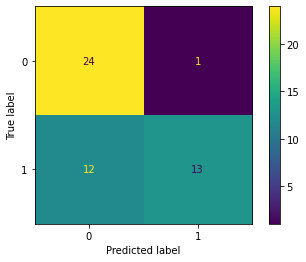

In [119]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
acc=accuracy_score(y_test,y_pred)
print(acc)
plot_confusion_matrix(classifier,x_test,y_test)